<a href="https://colab.research.google.com/github/sayakpaul/stable-diffusion-keras-ft/blob/main/notebooks/generate_images_with_finetuned_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

This notebook shows a side by side comparison between images generated by original and fine-tuned KerasCV's StableDiffusion models. The finetuning methods that we used could be found in this [repository](https://github.com/sayakpaul/stabe-diffusion-keras-ft).

## Setup

In [ ]:
!pip install git+https://github.com/keras-team/keras-cv -q`

In [4]:
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

print(keras_cv.__version__)

0.3.5


## Prepare the models

### Download and load fine-tuned weights

We have fine-tuned Stable Diffusion based on the [Pokemon Dataset](https://huggingface.co/datasets/lambdalabs/pokemon-blip-captions) that is hosted in Hugging Face Datasets, and the fine-tuned model weights are available in this Hugging Face Model [repository](https://huggingface.co/sayakpaul/kerascv_sd_pokemon_finetuned/tree/main) which you could easily download with `keras.utils.get_file()` utility function.

Some details to note:
- Only the diffusion model is fine-tuned.The image encoder and the text encoder are kept frozen.
- Mixed-precision training is not yet supported. As a result, instead of 512x512 resolution, the fine-tuned weights are derived from 256x256 resolution of images.

In [5]:
weights_path = keras.utils.get_file(
    origin="https://huggingface.co/sayakpaul/kerascv_sd_pokemon_finetuned/resolve/main/ckpt_epochs_72_res_512_mp_True.h5"
)

pokemon_model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)
pokemon_model.diffusion_model.load_weights(weights_path)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


### Load original weights

In [6]:
original_model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


## Try-out of some prompts

In [7]:
def plot_images(images, title):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.title(title)
        plt.imshow(images[i])
        plt.axis("off")

### YODA

25/25 [==============================] - 69s 2s/step


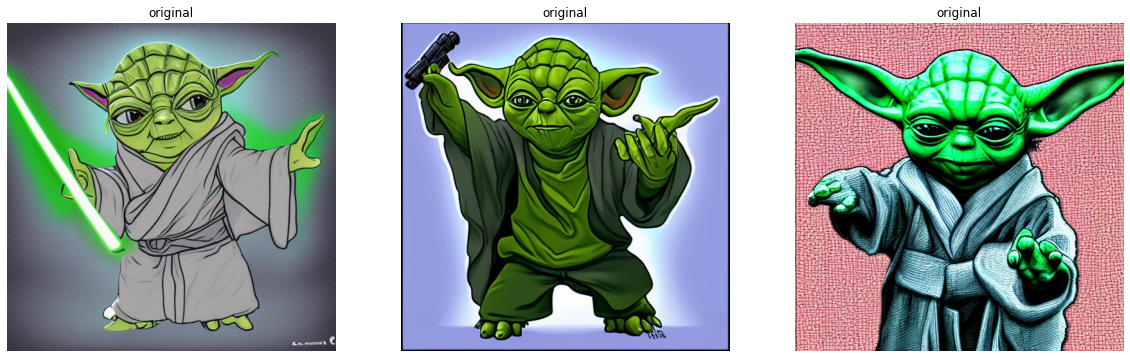

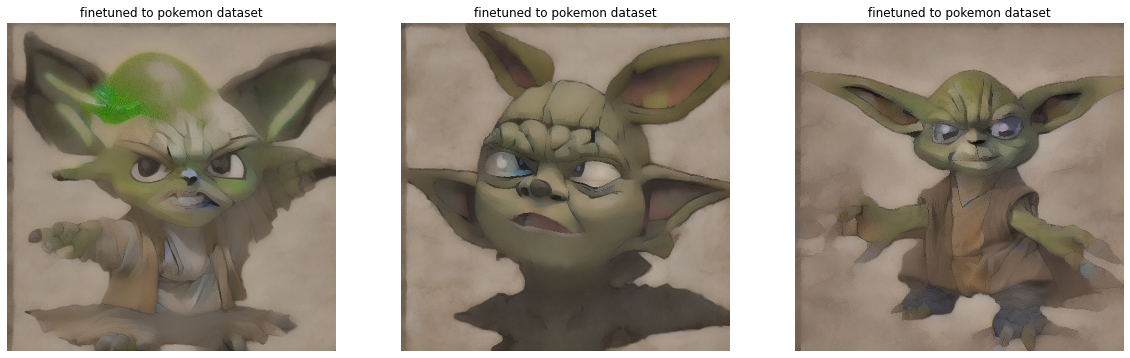

In [8]:
PROMPT = "Yoda"
BATCH_SIZE = 3

images_original = original_model.text_to_image(PROMPT, batch_size=BATCH_SIZE)
images_finetuned = pokemon_model.text_to_image(PROMPT, batch_size=BATCH_SIZE, unconditional_guidance_scale=50)

plot_images(images_original, "original")
plot_images(images_finetuned, "finetuned to pokemon dataset")

### robotic cat with wings

25/25 [==============================] - 60s 2s/step


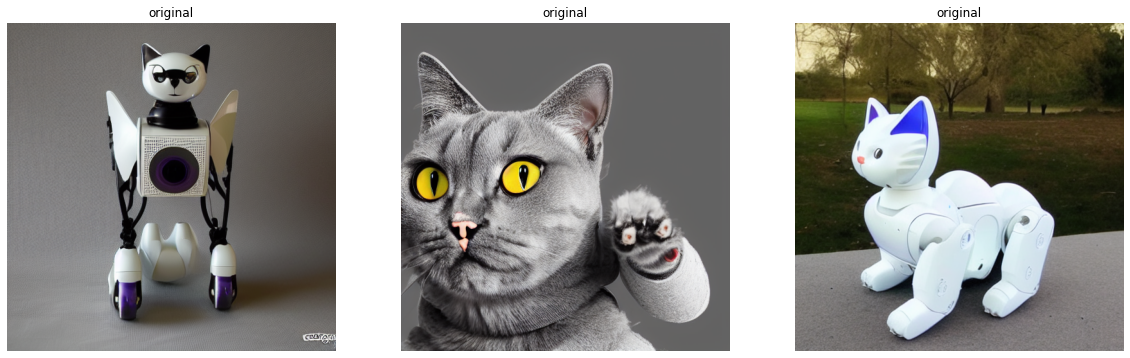

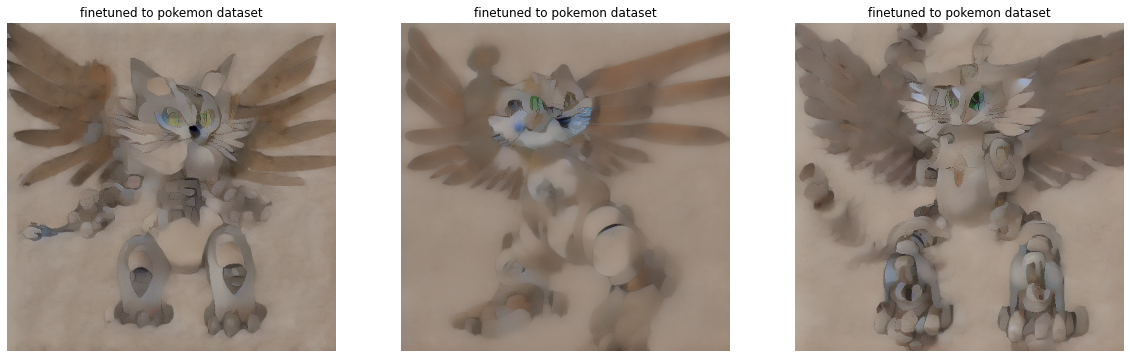

In [9]:
PROMPT = "robotic cat with wings"
BATCH_SIZE = 3

images_original = original_model.text_to_image(PROMPT, batch_size=BATCH_SIZE)
images_finetuned = pokemon_model.text_to_image(PROMPT, batch_size=BATCH_SIZE,  unconditional_guidance_scale=50)

plot_images(images_original, "original")
plot_images(images_finetuned, "finetuned to pokemon dataset")

### Girl with a pearl earring

25/25 [==============================] - 60s 2s/step


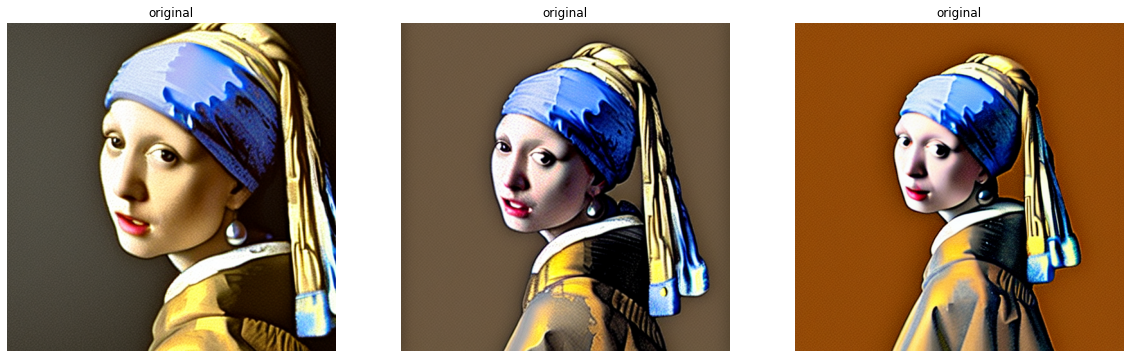

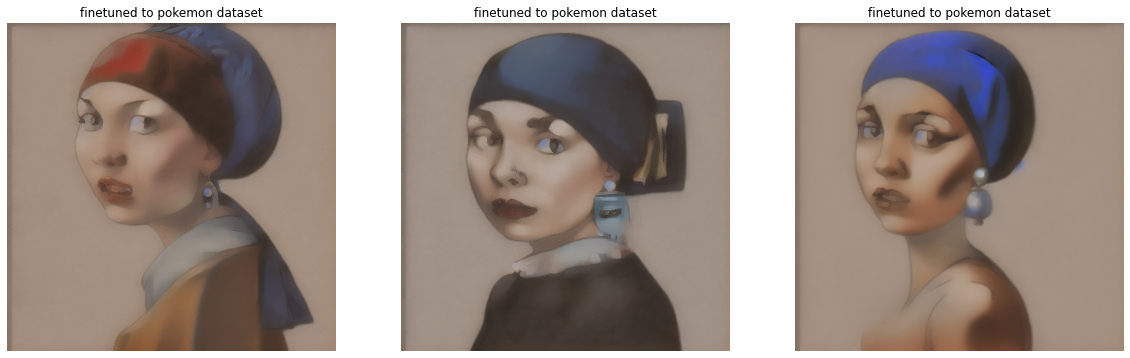

In [12]:
PROMPT = "Girl with a pearl earring"
BATCH_SIZE = 3

images_original = original_model.text_to_image(PROMPT, batch_size=BATCH_SIZE)
images_finetuned = pokemon_model.text_to_image(PROMPT, batch_size=BATCH_SIZE, unconditional_guidance_scale=50)

plot_images(images_original, "original")
plot_images(images_finetuned, "finetuned to pokemon dataset")

### Hello Kitty

25/25 [==============================] - 60s 2s/step


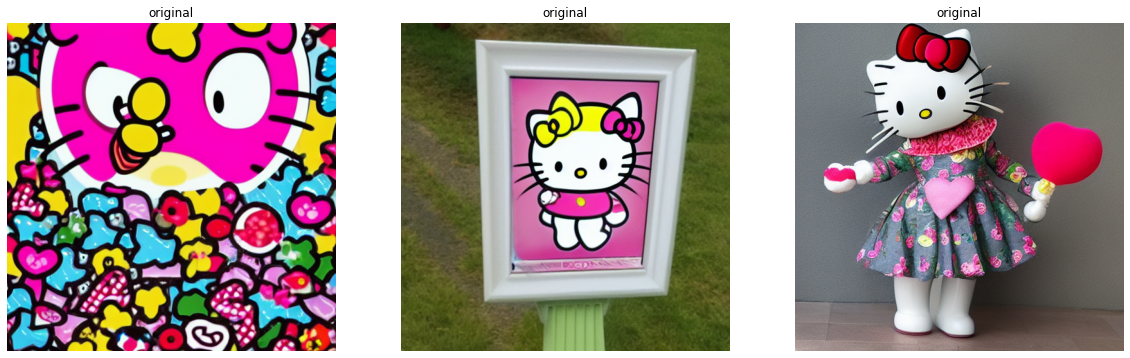

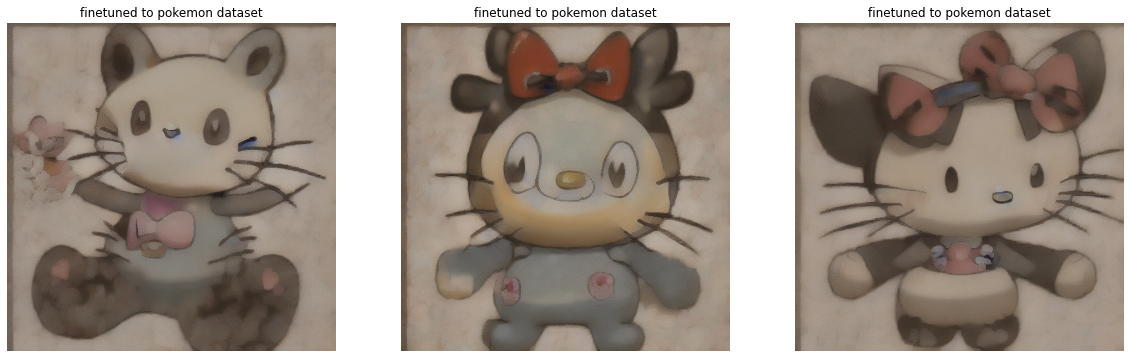

In [13]:
PROMPT = "Hello Kitty"
BATCH_SIZE = 3

images_original = original_model.text_to_image(PROMPT, batch_size=BATCH_SIZE)
images_finetuned = pokemon_model.text_to_image(PROMPT, batch_size=BATCH_SIZE, unconditional_guidance_scale=50)

plot_images(images_original, "original")
plot_images(images_finetuned, "finetuned to pokemon dataset")